# Generalized Linear Models

### Environment Setup
**⚠️Note: If running on a new environment, run this cell once and then restart the kernel⚠️**

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

from numpy.linalg import inv
from scipy import interpolate

%matplotlib inline

In [3]:
from dandi import dandiapi
from dandi import download


client = dandiapi.DandiAPIClient(token="f9459a77200783c455ec6f3cb0b6cd92fc9fe106")
dandiset = client.get_dandiset("000563")

for a in dandiset.get_assets():
    print(a.path)

A newer version (0.58.0) of dandi/dandi-cli is available. You are using 0.55.1


sub-1261734671/sub-1261734671_ses-1274061513_probe-2_ecephys.nwb
sub-1261734671/sub-1261734671_ses-1274061513_probe-4_ecephys.nwb
sub-1261734671/sub-1261734671_ses-1274061513_probe-0_ecephys.nwb
sub-1261734671/sub-1261734671_ses-1274061513_probe-1_ecephys.nwb
sub-1261734671/sub-1261734671_ses-1274061513_probe-3_ecephys.nwb
sub-1261734671/sub-1261734671_ses-1274061513_ogen.nwb
sub-1263814686/sub-1263814686_ses-1275082330_ogen.nwb
sub-1265640194/sub-1265640194_ses-1276522234_ogen.nwb
sub-682745/sub-682745_ses-1290822286_probe-1_ecephys.nwb
sub-682745/sub-682745_ses-1290822286_probe-4_ecephys.nwb
sub-682745/sub-682745_ses-1290822286_probe-3_ecephys.nwb
sub-682745/sub-682745_ses-1290822286_probe-2_ecephys.nwb
sub-682745/sub-682745_ses-1290822286_ogen.nwb
sub-682745/sub-682745_ses-1290822286_probe-5_ecephys.nwb
sub-682745/sub-682745_ses-1290822286_probe-0_ecephys.nwb
sub-685263/sub-685263_ses-1292234897_probe-4_ecephys.nwb
sub-685263/sub-685263_ses-1292234897_probe-3_ecephys.nwb
sub-685263/

### Downloading Files

In [4]:
# dandiset_id = "000021"
# dandi_filepath = "sub-717038285/sub-717038285_ses-732592105.nwb"
dandiset_id = "000563"
dandi_filepath = "sub-688546/sub-688546_ses-1295360519.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [5]:
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

PATH                          SIZE   DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-688546_ses-1295360519.nwb 3.2 GB 3.2 GB           100%    -     done                   
Summary:                      3.2 GB 3.2 GB                         1 done                 
                                     100.00%                                               
Downloaded file to ./sub-688546_ses-1295360519.nwb
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Selecting Neurons

In [34]:
spike_times = nwb.units[0].spike_times.item()

### Making Stim Trace

In [35]:
nwb.intervals.keys()

dict_keys(['RepeatFFF_presentations', 'UniqueFFF_presentations', 'invalid_times', 'receptive_field_block_presentations', 'spontaneous_presentations', 'static_block_presentations'])

In [36]:
flashes_table = nwb.intervals["RepeatFFF_presentations"]
flashes_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,index_repeat,Contrast,mask,opacity,orientation,phase,spatial_frequency,size,units,stimulus_index,color,tags,timeseries
id,,,,,,,,,,,,,,,,,
0,175.08735,175.10402,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(14400, 3, timestamps pynwb.base.TimeSeries a..."
1,175.08735,175.10402,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(14400, 3, timestamps pynwb.base.TimeSeries a..."
2,175.10402,175.12072,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(14403, 2, timestamps pynwb.base.TimeSeries a..."
3,175.10402,175.12072,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(14403, 2, timestamps pynwb.base.TimeSeries a..."
4,175.12072,175.13740,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(14405, 2, timestamps pynwb.base.TimeSeries a..."
5,175.12072,175.13740,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(14405, 2, timestamps pynwb.base.TimeSeries a..."
6,175.13740,175.15406,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(14407, 2, timestamps pynwb.base.TimeSeries a..."
7,175.13740,175.15406,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(14407, 2, timestamps pynwb.base.TimeSeries a..."
8,175.15406,175.17074,RepeatFFF,3.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(14409, 2, timestamps pynwb.base.TimeSeries a..."


In [37]:
len(set(flashes_table.color))

118

### Getting Running Times

In [38]:
running_data = nwb.processing["running"]["running_speed"].data
running_timestamps = nwb.processing["running"]["running_speed"].timestamps

### Interpolating Times

In [40]:
first_run_time = running_timestamps[0]
last_run_time = running_timestamps[-1]
first_stim_time = flashes_table.start_time[0]
last_stim_time = flashes_table.stop_time[-1]
first_time = max(first_stim_time, first_run_time)
last_time = min(last_stim_time, last_run_time)

run_start_idx, run_end_idx = np.searchsorted(running_timestamps, [first_time, last_time])
stim_start_idx, stim_end_idx = np.searchsorted(flashes_table.start_time, [first_time, last_time])

running_data_slice = running_data[start_idx:end_idx]
running_timestamps_slice = running_timestamps[start_idx:end_idx]

print("first time:", first_time, "last time:", last_time)

first time: 175.08735 last time: 895.69226


In [41]:
bin_res = np.mean(np.diff(flashes_table.start_time)) / 3
interp_hz = 1/bin_res
interp_hz

359.7019817935123

In [54]:
colors = flashes_table.color[stim_start_idx:stim_end_idx]
flash_frames = np.zeros(len(colors))
for i, color in enumerate(colors):
    flash_frames[i] = float(color)

In [55]:
time_axis = np.arange(first_time, last_time, step=(1/interp_hz))
f = interpolate.interp1d(flashes_table.start_time, flash_frames, axis=0, kind="nearest", fill_value="extrapolate")
interp_flashes = f(time_axis)

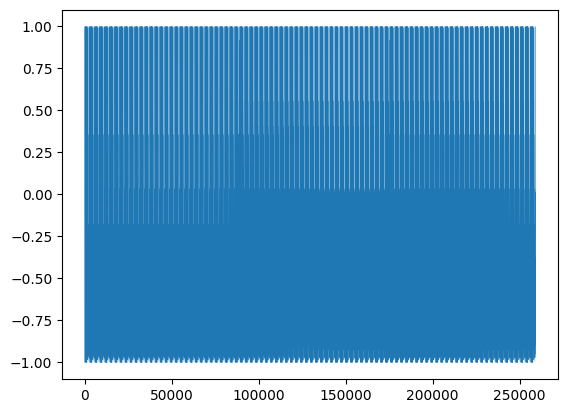

In [63]:
plt.plot(interp_flashes, lw=0.1)

In [57]:
# generate regularly-space x values and interpolate along it
time_axis = np.arange(first_time, last_time, step=(1/interp_hz))
f = interpolate.interp1d(running_timestamps_slice, running_data_slice, axis=0, kind="nearest", fill_value="extrapolate")
interp_running = f(time_axis)

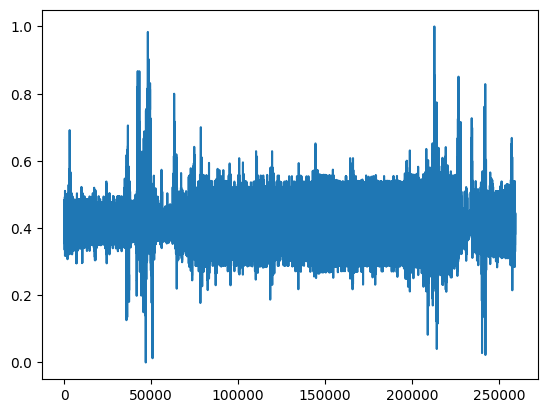

In [58]:
# plt.plot(interp_running)
norm_running = (interp_running-np.min(interp_running)) / (np.max(interp_running)-np.min(interp_running))
plt.plot(norm_running)

In [59]:
print(len(interp_flashes))
print(len(norm_running))

259204
259204


### Combine Stims

In [60]:
# coefficient to add running to stimulus
mod_coef = 0.5

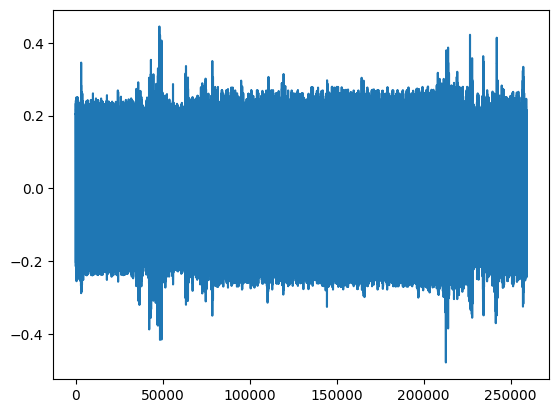

In [61]:
exog = interp_flashes * (norm_running * mod_coef)
plt.plot(exog)

### Building Design Matrix

In [64]:
ntfilt = 50

In [65]:
def get_design_mat(ntfilt, stim, num_time_bins):
    padded_stim = np.hstack((np.zeros((ntfilt-1)), stim)) # pad early bins of stimulus with zero
    design_mat = np.zeros((num_time_bins,ntfilt))
    for j in np.arange(num_time_bins):
        design_mat[j] = padded_stim[j:j+ntfilt] # grab last 'nkt' bins of stmiulus and insert into this row
    return design_mat

In [66]:
num_time_bins = len(exog)
design_mat = get_design_mat(ntfilt, exog, num_time_bins)

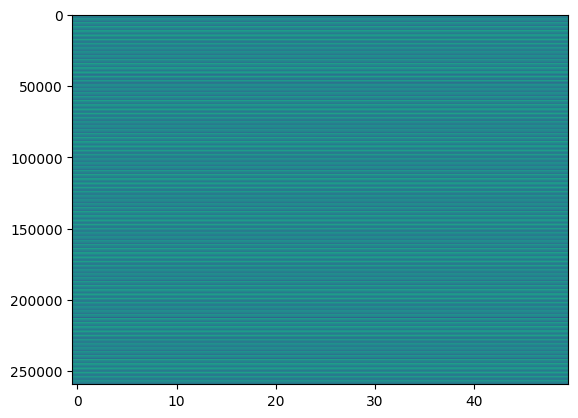

In [67]:
plt.imshow(design_mat, aspect="auto")

### Getting STA

In [68]:
def STA(design_mat, spikes_binned, num_spikes):
    return (design_mat.T @ spikes_binned) / num_spikes

def WSTA(design_mat, spikes_binned, num_spikes):
    sta = STA(design_mat, spikes_binned, num_spikes)
    return inv(design_mat.T @ design_mat) @ sta * num_spikes

In [69]:
num_spikes = len(spike_times)
spikes_bin_centers = np.arange(num_time_bins+1) * interp_hz # centers of bins for applying to spike train
spikes_binned,_ = np.histogram(spike_times, spikes_bin_centers)

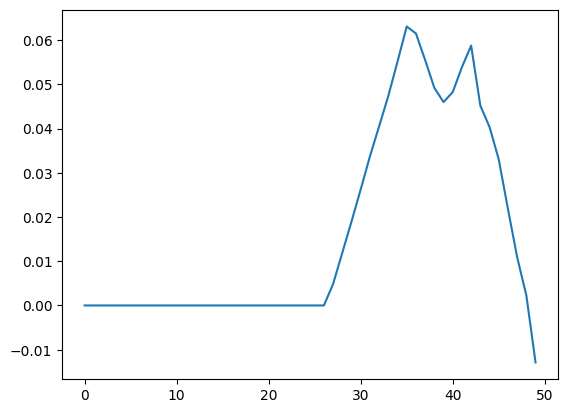

In [70]:
plt.plot(STA(design_mat, spikes_binned, num_spikes))

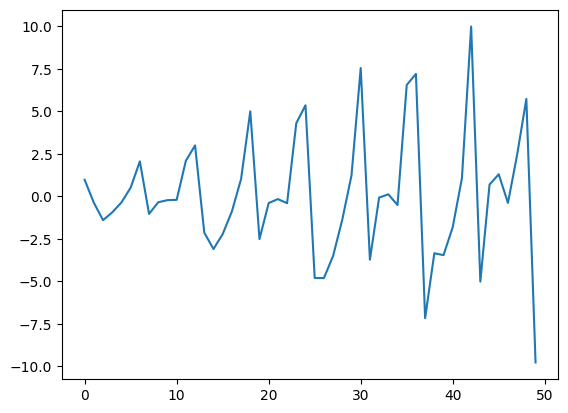

In [71]:
plt.plot(WSTA(design_mat, spikes_binned, num_spikes))

### Running MLE

In [72]:
def MLE(design_mat, spikes_binned):
    design_mat_offset = np.hstack((np.ones((design_mat.shape[0],1)), design_mat)) # just add a column of ones

    glm_poisson_exp = sm.GLM(endog=spikes_binned, exog=design_mat_offset,
                            family=sm.families.Poisson())

    pGLM_results = glm_poisson_exp.fit(max_iter=100, tol=1e-6, tol_criterion='params')

    # pGLM_const = glm_poisson_exp[-1].fit_['beta0'] # constant ("dc term)")
    pGLM_const = pGLM_results.params[0]
    pGLM_filt = pGLM_results.params[1:] # stimulus filter

    return pGLM_filt, pGLM_const

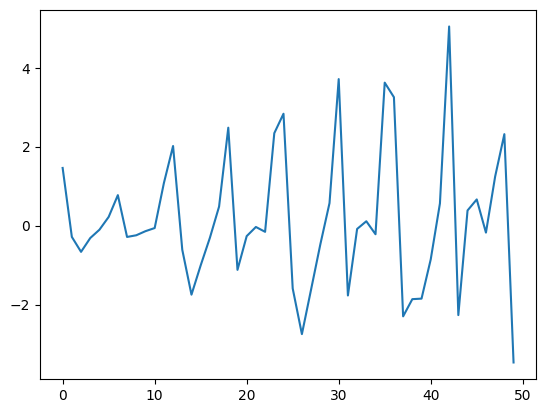

In [73]:
filt, const = MLE(design_mat, spikes_binned)
plt.plot(filt)

### running on many cells

In [74]:
def get_filter(spike_times, method="poisson"):
    these_spikes_bin_centers = np.arange(num_time_bins+1) * interp_hz # centers of bins for applying to spike train
    these_spikes_binned,_ = np.histogram(spike_times, these_spikes_bin_centers)

    print(len(spike_times))

    if method == "poisson":
        return MLE(design_mat, these_spikes_binned)
    elif method == "sta":
        return STA(design_mat, these_spikes_binned, num_spikes), 0
    elif method == "wsta":
        return WSTA(design_mat, these_spikes_binned, num_spikes), 0

In [75]:
filters = []
for i in range(100):
    try:
        if nwb.units[i].quality.item() == "good":
            print(i)
            filter, const = get_filter(nwb.units[i].spike_times.item())
            filters.append(filter)
    except:
        continue

0
444011
1
99697
2
374189
3
76814
4
814713
6
6225
7
459966
8
357578
9
509662
10
193138
11
75848
12
26730
14
13282
15
407713
16
1775
17
150228
18
275218
19
28255
20
309123
21
32578
22
57134
23
42927
24
34753
25
155085
26
2408
27
7771
28
56022
29
11756
30
312476
31
84852
32
141519
34
27072
35
2456
36
268428
37
282847
38
65134
39
449484
40
20773
42
116422
43
26092
44
210642
45
18708
46
7536
47
154548
48
58075
52
148
53
164078
55
265
56
12866
57
158447
58
34252
59
19238
60
10168
61
3214
62
18501
63
94657
64
104969
65
5794
66
37478
67
2093
68
254356
69
4471
70
349044
72
84135
73
53636
74
13
75
29310
76
104461
86
126623
87
60849
88
49472
93
52646
94
69963
95
52670
98
21799
99
81247


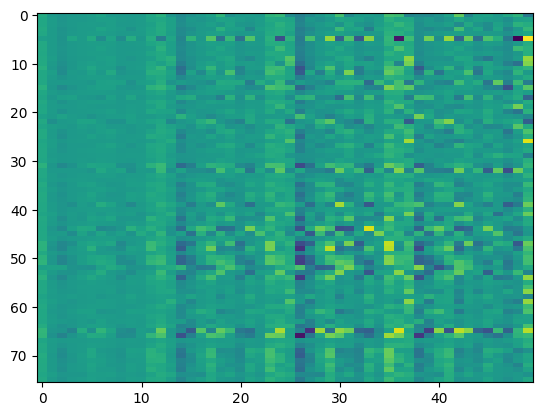

In [76]:
plt.imshow(np.array(filters), aspect="auto")

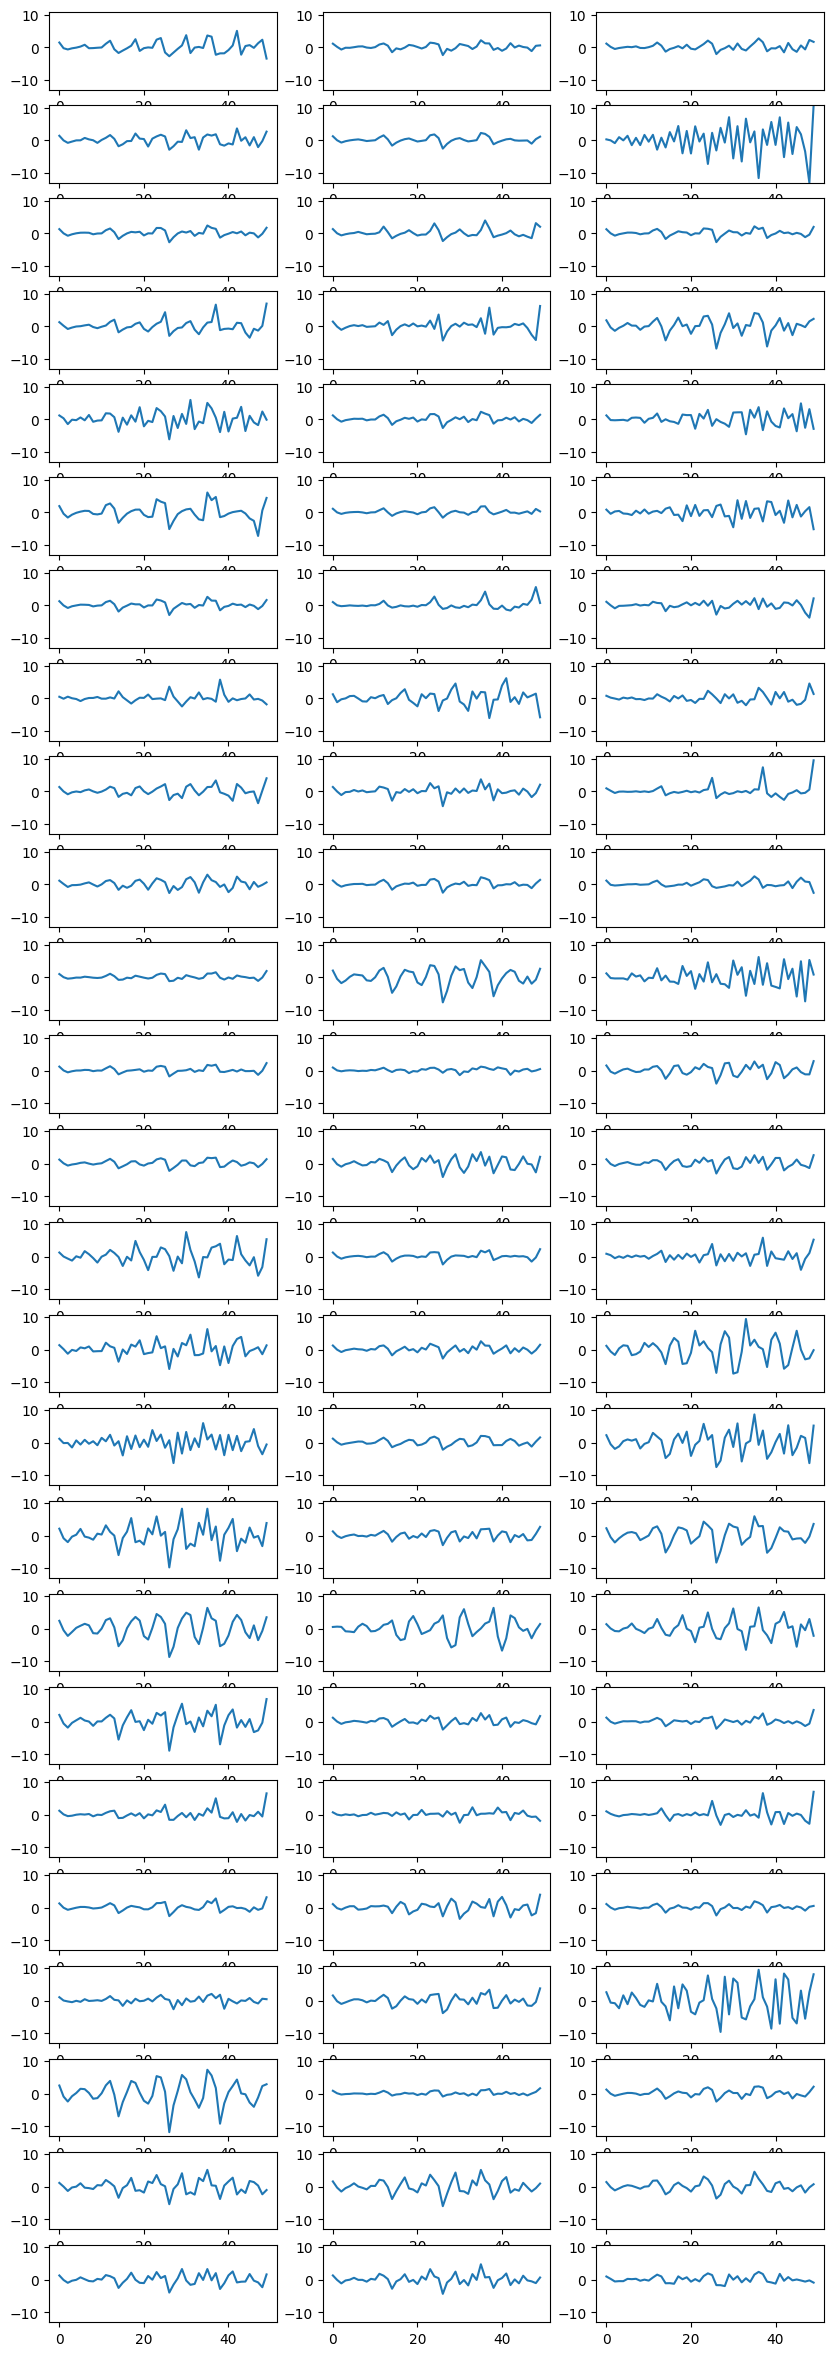

In [77]:
ymax, ymin = 0, 0
for i in range(len(filters)):
    filter = filters[i]
    if max(filter) > ymax:
        ymax = max(filter)
    if min(filter) < ymin:
        ymin = min(filter)

fig, axes = plt.subplots(len(filters)//3, 3, figsize=(10,30))
for i in range(len(axes.flatten())):
    filter = filters[i]
    row = i // 3
    col = i % 3
    axes[row][col].plot(filter)
    axes[row][col].set_ylim([ymin, ymax])

### Attempting usage